### Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

from mysql.connector import connect, Error

import warnings
warnings.filterwarnings("ignore")

<p>Principais biliotecas e versoes utilizadas</p>

In [2]:
%reload_ext watermark
%watermark -a "Joao Paulo Ribeiro dos Santos" --iversions

Author: Joao Paulo Ribeiro dos Santos

pandas    : 1.2.4
seaborn   : 0.11.1
matplotlib: 3.3.4



### Importado Dados

In [3]:
# String de Conexao
config = {
  'user': 'teste-dados-leitura',
  'password': 'o7c4Cc8NDeXYbAMH',
  'host': '35.199.76.222',
  'database': 'teste_dados',
  'raise_on_warnings': True
}
    
cnx = mysql.connector.connect(**config)

In [4]:
# Querry e Dataframe gerado
querry = '''
select 
    date,
    daily_confirmed_cases,
    daily_deaths,
    confirmed_cases,
    deaths,
    countries_and_territories, 
    geo_id
from 
    DADOS_COVID
'''

df_covid_data = pd.read_sql_query(querry, cnx)
cnx.close()

In [5]:
# Dados
df_covid_data.head(5)

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id
0,2020-03-20,1,0,1,0,Chad,TD
1,2020-03-21,0,0,1,0,Chad,TD
2,2020-03-22,1,0,2,0,Chad,TD
3,2020-03-23,0,0,2,0,Chad,TD
4,2020-03-24,0,0,2,0,Chad,TD


### Analisando os dados

In [6]:
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date                       61900 non-null  object
 1   daily_confirmed_cases      61900 non-null  int64 
 2   daily_deaths               61900 non-null  int64 
 3   confirmed_cases            61900 non-null  int64 
 4   deaths                     61900 non-null  int64 
 5   countries_and_territories  61900 non-null  object
 6   geo_id                     61900 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.3+ MB


In [7]:
# Total de valores nulos
df_covid_data.isnull().sum()

date                         0
daily_confirmed_cases        0
daily_deaths                 0
confirmed_cases              0
deaths                       0
countries_and_territories    0
geo_id                       0
dtype: int64

In [8]:
# Converter campo date para datetime
df_covid_data['date'] = pd.to_datetime(df_covid_data['date'])
df_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       61900 non-null  datetime64[ns]
 1   daily_confirmed_cases      61900 non-null  int64         
 2   daily_deaths               61900 non-null  int64         
 3   confirmed_cases            61900 non-null  int64         
 4   deaths                     61900 non-null  int64         
 5   countries_and_territories  61900 non-null  object        
 6   geo_id                     61900 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 3.3+ MB


### EDA

In [9]:
# Analise estatistica geral
df_covid_data.describe()

,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths
count,61900.000000,61900.000000,6.190000e+04,61900.000000
mean,1155.147237,26.055460,1.005831e+05,3101.676785
std,6779.224479,131.227055,6.074374e+05,15538.122301
min,-8261.000000,-1918.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,1.277500e+02,1.000000
50%,15.000000,0.000000,2.047000e+03,42.000000
75%,273.000000,4.000000,2.456775e+04,463.000000
max,234633.000000,4928.000000,1.625675e+07,299177.000000


Sera preciso analisar coluna por coluna, mas com essa simpels analise captamos informacoes incomuns, perceba que o registro de mortes diarias e casos confirmados possuem valores negativos, o que nao faz sentido

In [10]:
def fn_show_individual_outlier(p_df_dataframe, p_column):
    """
    Description:
        Função que exibe um boxplot e as estatisticas descritivas de uma dada coluna de um dataframe

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        None
    
    Exception:
        None
    """
    ## Dataframe com as estatisticas descritivas
    df_summary = pd.DataFrame(p_df_dataframe[p_column].describe())

    ## Tamanho Figura
    plt.figure(figsize = (4, 6))
    
    ## Objeto referente ao boxplot
    ax = sns.boxplot(data = p_df_dataframe[p_column])
    
    ## deixando os x_ticks com valor em branco
    ax.set(xticklabels = [])
    ax.set(ylabel = None)
    
    ## Titulo do boxplot com o nome da coluna
    ax.set(title = 'Parâmetro: ' + p_column)
    
    ## Tabela que será gerada junto com o gráfico, onde tera as estatisticas
    statistics_table = plt.table( cellText = df_summary.values,
                                    rowLabels = df_summary.index,
                                    colLabels =  ' ',
                                    cellLoc = 'left', 
                                    rowLoc = 'center',            
                                    loc ='bottom')
    
    ## Tamanho da fonte da tabela
    statistics_table.set_fontsize(12)
    
    ## Escala da tabela
    statistics_table.scale(1, 2)
    
    ## Colocar a tabela debaixo do boxplot
    plt.subplots_adjust(left = 0.2, bottom = .1)
    
    ## Exibir figura
    plt.show()

#### Column 'daily_confirmed_cases'

In [11]:
# analise estatistica geral
df_covid_data['daily_confirmed_cases'].describe()

count     61900.000000
mean       1155.147237
std        6779.224479
min       -8261.000000
25%           0.000000
50%          15.000000
75%         273.000000
max      234633.000000
Name: daily_confirmed_cases, dtype: float64

In [12]:
# Quantidade de casos confirmados abaixo de ZERO
df_covid_data[df_covid_data['daily_confirmed_cases'] < 0].count()[0]

18

In [13]:
# Analisando dados
df_covid_data[df_covid_data['daily_confirmed_cases'] < 0]

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id
3544,2020-05-20,-209,0,130,2,Benin,BJ
6290,2020-06-20,-148,47,238011,34561,Italy,IT
8695,2020-04-19,-713,410,193252,20453,Spain,ES
8730,2020-05-25,-372,-1918,235400,26834,Spain,ES
11667,2020-06-03,-766,107,151325,28940,France,FR
13605,2020-09-11,-6,0,379,32,Jersey,JE
13911,2020-07-22,-110,0,1113,11,Jordan,JO
18706,2020-05-21,-115,0,145,0,Uganda,UG
18718,2020-06-02,-1,0,457,0,Uganda,UG
24195,2020-05-07,-2461,49,29420,1618,Ecuador,EC


Nao faz sentido ter casos confirmados negativos, indicando que esses dados podem ser erros de digitacao, ou alguma inconsistencia foi realizada na extracao dessas informacoes. Esses dados sera excluidos do dataframe

In [14]:
# Excluinbdo os dados
index_num = df_covid_data[df_covid_data['daily_confirmed_cases'] < 0].index
df_covid_data.drop(index_num, inplace = True)

In [15]:
# analise estatistica geral
df_covid_data['daily_confirmed_cases'].describe()

count     61882.000000
mean       1155.747633
std        6780.041617
min           0.000000
25%           0.000000
50%          15.000000
75%         274.000000
max      234633.000000
Name: daily_confirmed_cases, dtype: float64

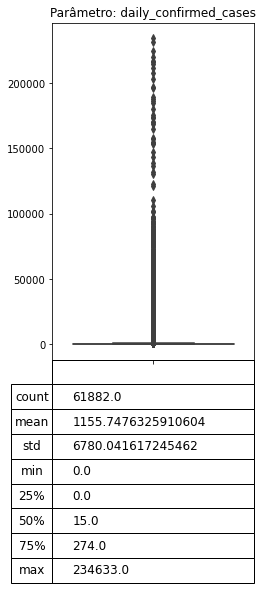

In [16]:
# Verificando outliers
fn_show_individual_outlier(df_covid_data, 'daily_confirmed_cases')

A uma quantidade absurda de outliers, contudo tais dados fazem sentido pois o numero de casos confirmados aumentou com o passar do tempo, ainda mais considerando que se trata de uma pandemia.

#### Colums 'daily_deaths'

In [17]:
# analise estatistica geral
df_covid_data['daily_deaths'].describe()

count    61882.000000
mean        26.021299
std        130.121867
min       -443.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       4928.000000
Name: daily_deaths, dtype: float64

In [18]:
# Quantidade de casos confirmados abaixo de ZERO
df_covid_data[df_covid_data['daily_deaths'] < 0].count()[0]

7

In [19]:
# Analisando dados
df_covid_data[df_covid_data['daily_deaths'] < 0]

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id
6295,2020-06-25,577,-31,239410,34644,Italy,IT
8737,2020-08-12,3172,-2,329784,28579,Spain,ES
14004,2020-08-06,218,-12,9492,284,Kosovo,XK
23470,2020-07-05,121,-1,12440,351,Czechia,CZ
23471,2020-07-06,75,-3,12515,348,Czechia,CZ
27114,2020-10-03,466,-5,37063,1801,Ireland,IE
44870,2020-08-24,237,-443,43126,1057,Kyrgyzstan,KG


Nao faz sentido haver mortes diarias negativas, a menos que indicasse erro em algum dia anterior e de alguma forma fosse feita uma subtracao dos dados gerais. O que tambem nao e adequado de se fazer.
Pra todos os efeitos esses valores negativos serao excluidos

In [20]:
# Excluinbdo os dados
index_num = df_covid_data[df_covid_data['daily_deaths'] < 0].index
df_covid_data.drop(index_num, inplace = True)

In [21]:
# analise estatistica geral
df_covid_data['daily_deaths'].describe()

count    61875.000000
mean        26.032275
std        130.115067
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max       4928.000000
Name: daily_deaths, dtype: float64

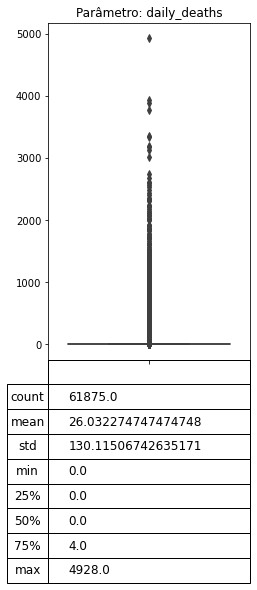

In [22]:
# Verificando outliers
fn_show_individual_outlier(df_covid_data, 'daily_deaths')

A taxa de mortes possui diversos outliers, oq ue tambem faz sentido dado que as mortes aumentaram significativamente a partir do primeiro trimestre de 2020

#### Column 'confirmed_cases' and 'deaths'

In [23]:
# analise estatistica geral
df_covid_data['confirmed_cases'].describe()

count    6.187500e+04
mean     1.005957e+05
std      6.075566e+05
min      0.000000e+00
25%      1.270000e+02
50%      2.046000e+03
75%      2.451900e+04
max      1.625675e+07
Name: confirmed_cases, dtype: float64

In [24]:
# analise estatistica geral
df_covid_data['deaths'].describe()

count     61875.000000
mean       3099.776420
std       15539.002013
min           0.000000
25%           1.000000
50%          42.000000
75%         462.000000
max      299177.000000
Name: deaths, dtype: float64

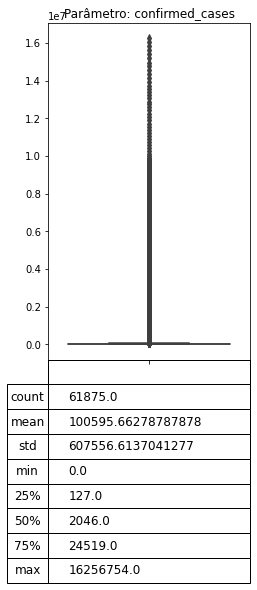

In [25]:
# Verificando outliers
fn_show_individual_outlier(df_covid_data, 'confirmed_cases')

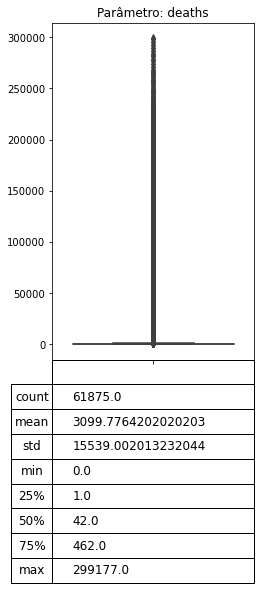

In [26]:
# Verificando outliers
fn_show_individual_outlier(df_covid_data, 'deaths')

Os outliers podem ser explicado pelo fato que os casos confirmados e mortes aumentaram com o passar do tempo, inclusive a uma taxa muito elevada

#### Column 'date'

In [27]:
# Menor data
df_covid_data['date'].min()

Timestamp('2019-12-31 00:00:00')

In [28]:
# Maior Data
df_covid_data['date'].max()

Timestamp('2020-12-14 00:00:00')

O periodo analisado esta contido entre as datas 31/12/2019 e 14/12/2020

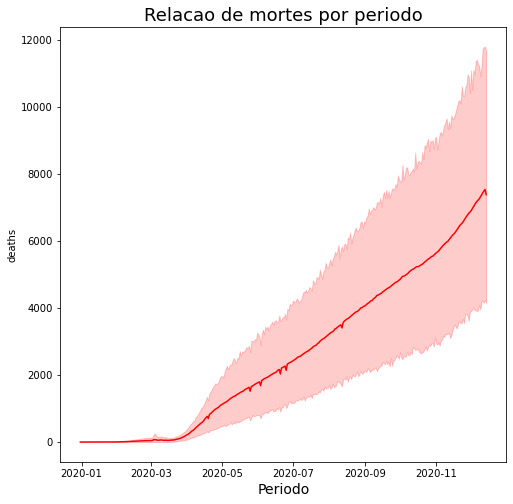

In [29]:
# Relacao de mortes por periodo

# Tamanho da figura
plt.figure(figsize = (8, 8))

sns.lineplot(x = 'date', 
             y = 'deaths', 
             color = 'red',
             data = df_covid_data)

# Texto eixo X
plt.xlabel('Periodo',
           fontsize = 14)

# Titulo
plt.title('Relacao de mortes por periodo', 
          fontsize = 18)

# Exibir
plt.show()

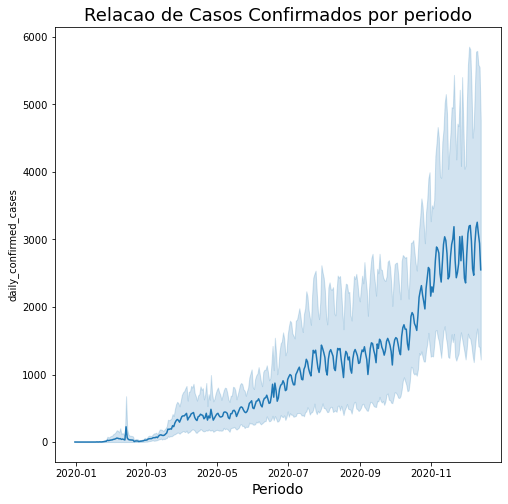

In [30]:
# Relacao de Casos Confirmados por periodo

# Tamanho da figura
plt.figure(figsize = (8, 8))

sns.lineplot(x = 'date', 
             y = 'daily_confirmed_cases', 
             data = df_covid_data)

# Texto eixo X
plt.xlabel('Periodo',
           fontsize = 14)

# Titulo
plt.title('Relacao de Casos Confirmados por periodo', 
          fontsize = 18)

# Exibir
plt.show()

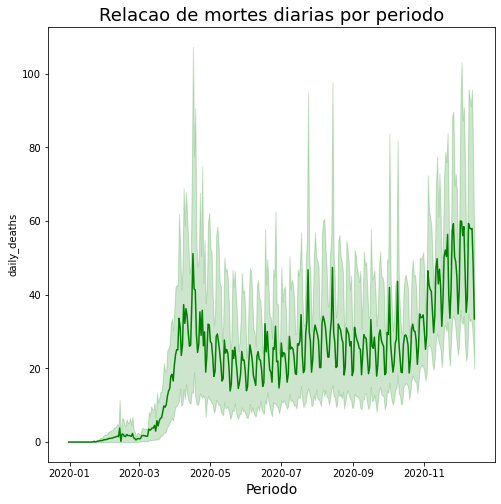

In [31]:
# Relacao de Casos Confirmados por periodo

# Tamanho da figura
plt.figure(figsize = (8, 8))

sns.lineplot(x = 'date', 
             y = 'daily_deaths', 
             color = 'green',
             data = df_covid_data)

# Texto eixo X
plt.xlabel('Periodo',
           fontsize = 14)

# Titulo
plt.title('Relacao de mortes diarias por periodo', 
          fontsize = 18)

# Exibir
plt.show()

A partir de uma analise inicial dos graficos apresentados, precebe-se que a uma relacao entre mortes diarias e casos confirmados, dado que com o passar do tempo ambas tiveram um acrescimo significativo

#### Column 'countries_and_territories'

In [32]:
# Quantidade de registros por territorio
df_covid_data['countries_and_territories'].value_counts()

Russia                               350
Japan                                350
Austria                              350
Iran                                 350
Belgium                              350
                                    ... 
BonAire, Saint Eustatius and Saba      1
UkrainE                                1
TunisiA                                1
BraZil                                 1
CostA_Rica                             1
Name: countries_and_territories, Length: 236, dtype: int64

Nessa rapida analise podemos perceber que ha paises com o nome diferenciado por caracteres distintos, seja letras maiusculas ou minusculas misturadas, dando a entender haver mais paises do que os existentes.

Aplicaremos um tratamento simples a esses campos textuais, colocando tudo em maiusculo

In [37]:
df_covid_data['countries_and_territories'] = df_covid_data['countries_and_territories'].str.upper()

df_covid_data['geo_id'] = df_covid_data['geo_id'].str.upper()

In [38]:
df_covid_data

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id
0,2020-03-20,1,0,1,0,CHAD,TD
1,2020-03-21,0,0,1,0,CHAD,TD
2,2020-03-22,1,0,2,0,CHAD,TD
3,2020-03-23,0,0,2,0,CHAD,TD
4,2020-03-24,0,0,2,0,CHAD,TD
...,...,...,...,...,...,...,...
61894,2020-03-02,0,0,705,6,CASES_ON_AN_INTERNATIONAL_CONVEYANCE_JAPAN,JPG11668
61895,2020-02-24,57,1,691,3,CASES_ON_AN_INTERNATIONAL_CONVEYANCE_JAPAN,JPG11668
61896,2020-02-26,0,1,691,4,CASES_ON_AN_INTERNATIONAL_CONVEYANCE_JAPAN,JPG11668
61898,2020-02-20,79,2,621,2,CASES_ON_AN_INTERNATIONAL_CONVEYANCE_JAPAN,JPG11668


In [50]:
# Remover valores em branco nos textos
df_covid_data['countries_and_territories'] = df_covid_data['countries_and_territories'].apply(lambda x: x.strip())
df_covid_data['geo_id'] = df_covid_data['geo_id'].apply(lambda x: x.strip())

In [51]:
# Quantidade de registros por territorio
df_covid_data['countries_and_territories'].value_counts()

BRAZIL                                        350
NETHERLANDS                                   350
TAIWAN                                        350
AUSTRIA                                       350
SWITZERLAND                                   350
                                             ... 
CASES_ON_AN_INTERNATIONAL_CONVEYANCE_JAPAN     63
SOLOMON_ISLANDS                                60
WALLIS_AND_FUTUNA                              59
MARSHALL_ISLANDS                               47
VANUATU                                        34
Name: countries_and_territories, Length: 214, dtype: int64

In [56]:
# Verificar se ha valores duplicados
bool_series = df_covid_data[["date", 'countries_and_territories']].duplicated()
df_covid_data[bool_series]

,date,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id


Apos tratamento, verificaremos se os territorios existentes, texto a texto afim de ver se ha algo inconsistente

In [55]:
df_covid_data['countries_and_territories'].sort_values().unique()

array(['AFGHANISTAN', 'ALBANIA', 'ALGERIA', 'ANDORRA', 'ANGOLA',
       'ANGUILLA', 'ANTIGUA_AND_BARBUDA', 'ARGENTINA', 'ARMENIA', 'ARUBA',
       'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN',
       'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN',
       'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BONAIRE, SAINT EUSTATIUS AND SABA', 'BOSNIA_AND_HERZEGOVINA',
       'BOTSWANA', 'BRAZIL', 'BRITISH_VIRGIN_ISLANDS',
       'BRUNEI_DARUSSALAM', 'BULGARIA', 'BURKINA_FASO', 'BURUNDI',
       'CAMBODIA', 'CAMEROON', 'CANADA', 'CAPE_VERDE',
       'CASES_ON_AN_INTERNATIONAL_CONVEYANCE_JAPAN', 'CAYMAN_ISLANDS',
       'CENTRAL_AFRICAN_REPUBLIC', 'CHAD', 'CHILE', 'CHINA', 'COLOMBIA',
       'COMOROS', 'CONGO', 'COSTA_RICA', 'COTE_DIVOIRE', 'CROATIA',
       'CUBA', 'CURAÇAO', 'CYPRUS', 'CZECHIA',
       'DEMOCRATIC_REPUBLIC_OF_THE_CONGO', 'DENMARK', 'DJIBOUTI',
       'DOMINICA', 'DOMINICAN_REPUBLIC', 'ECUADOR', 'EGYPT',
       'EL_SALVADOR', 'EQUATORIAL_GUINEA', 'ERI

Os textos referentes aos territorios sao congruentes, ainda mais considerando que foram acrescidos paises, ilhas e territorios sem dominio. Faz sentido haver tantos registros

### Gerando dados

<p>OS tramentos e analises foram feitos, sendo assim resta apenas gerar um novo dataset com os dados ja tratados</p>

In [57]:
df_covid_data.to_csv('datasets/covid_data.csv', index = False)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/covid_data.csv'